In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(42)

In [2]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
print(f'train_images.shape：{train_images.shape}，train_labels.shape:{train_labels.shape}')
print(f'test_images.shape：{test_images.shape}，test_images.shape:{test_labels.shape}')

train_images.shape：(60000, 28, 28, 1)，train_labels.shape:(60000,)
test_images.shape：(10000, 28, 28, 1)，test_images.shape:(10000,)


In [5]:
def lenet5_for_mnist():
    model = tf.keras.Sequential()

    # 由于图像大小为 28x28，这里调整第一层卷积层的参数
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', padding='same',input_shape=(28, 28,1)))

    # 第二层：下采样层 S2
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))

    # 第三层：卷积层 C3
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))

    # 第四层：下采样层 S4
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))

    # 第五层：卷积层 C5
    model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'))

    # 将卷积层的输出展平为一维向量
    model.add(tf.keras.layers.Flatten())

    # 第六层：全连接层 F6
    model.add(tf.keras.layers.Dense(84, activation='tanh'))

    # 第七层：输出层
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

In [6]:
model = lenet5_for_mnist()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 14s 5ms/step - loss: 0.4455 - accuracy: 0.8659 - val_loss: 0.1167 - val_accuracy: 0.9657
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1047 - accuracy: 0.9689 - val_loss: 0.0819 - val_accuracy: 0.9772
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0695 - val_accuracy: 0.9789
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0638 - val_accuracy: 0.9804
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0555 - val_accuracy: 0.9836
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0649 - val_accuracy

In [7]:
model.save_weights('model_weights.h5')

In [8]:
model = lenet5_for_mnist()
model.load_weights('model_weights.h5')

In [9]:
test_predictions = model.predict(test_images)
test_predicted_labels = tf.argmax(test_predictions, axis=1)

from tensorflow.keras.metrics import Accuracy
accuracy_metric = Accuracy()
accuracy_metric.update_state(test_labels, test_predicted_labels)
test_accuracy = accuracy_metric.result().numpy()
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.9828000068664551


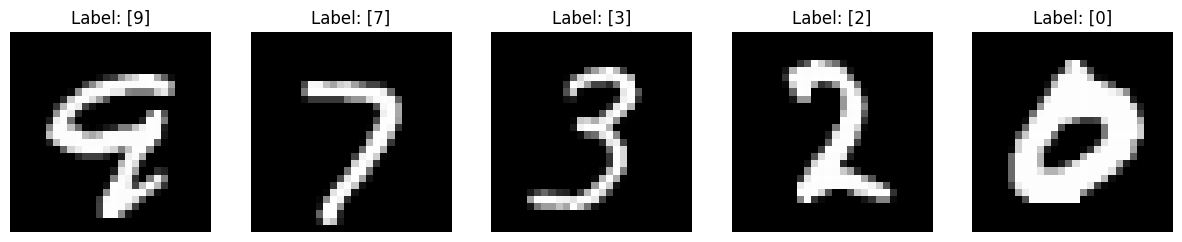

In [10]:
random_indices = np.random.choice(len(test_images), 5, replace=False)

# 创建一个包含 5 个子图的图，每行显示 5 张图片
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    image = test_images[random_indices[i]].astype('float32').reshape(-1,28,28,1)
    probabilities=model.predict(image)
    predicted_label=tf.argmax(probabilities,1)
    image=image.reshape(28,28)*255
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {predicted_label}')
    ax.axis('off')
plt.show()